<a href="https://colab.research.google.com/github/pediredlachetan/Face-Mask/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.Kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/ kaggle.json

In [ ]:
#!/bin/bash
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Extracting the compressed dataset
from zipfile import ZipFile
dataset=('/content/face-mask-dataset.zip')

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The data is extracted")

The data is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask=os.listdir('/content/data/with_mask')
print(with_mask[0:5])
print(with_mask[-5:])


['with_mask_820.jpg', 'with_mask_2949.jpg', 'with_mask_1900.jpg', 'with_mask_1766.jpg', 'with_mask_1824.jpg']
['with_mask_1533.jpg', 'with_mask_1806.jpg', 'with_mask_1545.jpg', 'with_mask_308.jpg', 'with_mask_2028.jpg']


In [ ]:
without_mask=os.listdir('/content/data/without_mask')
print(without_mask[0:5])
print(without_mask[-5:])


['without_mask_2836.jpg', 'without_mask_410.jpg', 'without_mask_1256.jpg', 'without_mask_1808.jpg', 'without_mask_2755.jpg']
['without_mask_2414.jpg', 'without_mask_599.jpg', 'without_mask_1996.jpg', 'without_mask_477.jpg', 'without_mask_590.jpg']


In [ ]:
print("No.of mask images:",len(with_mask))

No.of mask images: 3725


In [ ]:
print("No.of with out mask:",len(without_mask))

No.of with out mask: 3828


Creating labels for 2 class of images

with_mask --->1

without__mask --->0

In [ ]:
with_mask_labels=[1]*len(with_mask)
without_mask_labels=[0]*len(without_mask)

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels=with_mask_labels + without_mask_labels

In [ ]:
print(len(labels))

7553


In [ ]:
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

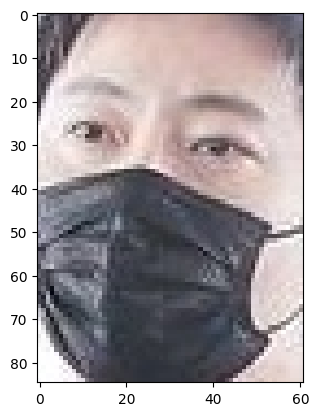

In [ ]:
#Displaying with_mask image
img=mpimg.imread('/content/data/with_mask/with_mask_44.jpg')
imgplot=plt.imshow(img)
plt.show()


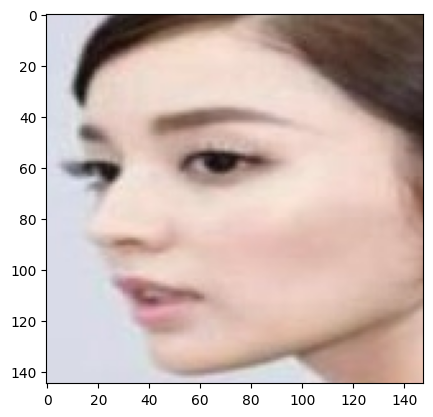

In [ ]:
#Displaying without_mask image
img=mpimg.imread('/content/data/without_mask/without_mask_757.jpg')
imgplot=plt.imshow(img)
plt.show()


Image Processing

1.Resizing the images

2.Convert the images to numpy

In [ ]:
#convert images to numpy arrays

with_mask_path=('/content/data/with_mask/')

data=[]

for img_file in with_mask:

  image=Image.open(with_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path=('/content/data/without_mask/')

for img_file in without_mask:

  image=Image.open(without_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

array([[[194, 183, 181],
        [195, 184, 181],
        [196, 185, 182],
        ...,
        [158, 132, 109],
        [158, 132, 109],
        [158, 132, 109]],

       [[177, 165, 160],
        [178, 166, 161],
        [179, 167, 162],
        ...,
        [159, 133, 110],
        [159, 133, 110],
        [159, 133, 110]],

       [[157, 143, 132],
        [158, 143, 132],
        [159, 144, 133],
        ...,
        [160, 134, 111],
        [160, 134, 111],
        [160, 134, 111]],

       ...,

       [[151,  98, 113],
        [154,  99, 115],
        [157, 101, 116],
        ...,
        [171, 184, 179],
        [177, 187, 185],
        [188, 197, 196]],

       [[155, 107, 125],
        [156, 107, 125],
        [156, 108, 125],
        ...,
        [184, 192, 190],
        [187, 195, 194],
        [195, 202, 200]],

       [[164, 118, 139],
        [161, 117, 137],
        [156, 118, 135],
        ...,
        [194, 197, 202],
        [198, 202, 204],
        [200, 205, 203]]], dtype=uint8)
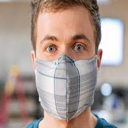

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#Converting data list and label list to numpy array
x=np.array(data)
y=np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(x)

[[[[194 183 181]
   [195 184 181]
   [196 185 182]
   ...
   [158 132 109]
   [158 132 109]
   [158 132 109]]

  [[177 165 160]
   [178 166 161]
   [179 167 162]
   ...
   [159 133 110]
   [159 133 110]
   [159 133 110]]

  [[157 143 132]
   [158 143 132]
   [159 144 133]
   ...
   [160 134 111]
   [160 134 111]
   [160 134 111]]

  ...

  [[151  98 113]
   [154  99 115]
   [157 101 116]
   ...
   [171 184 179]
   [177 187 185]
   [188 197 196]]

  [[155 107 125]
   [156 107 125]
   [156 108 125]
   ...
   [184 192 190]
   [187 195 194]
   [195 202 200]]

  [[164 118 139]
   [161 117 137]
   [156 118 135]
   ...
   [194 197 202]
   [198 202 204]
   [200 205 203]]]


 [[[144 139 136]
   [144 139 136]
   [144 139 136]
   ...
   [141 140 138]
   [142 141 139]
   [143 142 140]]

  [[144 139 136]
   [144 139 136]
   [144 139 136]
   ...
   [141 140 138]
   [142 141 139]
   [143 142 140]]

  [[144 139 136]
   [144 139 136]
   [144 139 136]
   ...
   [141 140 138]
   [142 141 139]
   [143 142

In [ ]:
print(y)

[1 1 1 ... 0 0 0]


Train test split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(7553,) (6042,) (1511,)


In [ ]:
#Scaling the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255


In [ ]:
x_train_scaled[0]

array([[[0.24705882, 0.25490196, 0.2       ],
        [0.2       , 0.20784314, 0.15294118],
        [0.17254902, 0.17647059, 0.12156863],
        ...,
        [0.2745098 , 0.21568627, 0.14117647],
        [0.27058824, 0.21568627, 0.14117647],
        [0.2627451 , 0.21960784, 0.14117647]],

       [[0.20392157, 0.20392157, 0.14117647],
        [0.17254902, 0.17254902, 0.10980392],
        [0.14901961, 0.14901961, 0.08627451],
        ...,
        [0.28235294, 0.22745098, 0.16078431],
        [0.2745098 , 0.22352941, 0.15686275],
        [0.26666667, 0.22352941, 0.15294118]],

       [[0.18431373, 0.17254902, 0.10196078],
        [0.16862745, 0.16078431, 0.08627451],
        [0.16078431, 0.14901961, 0.08627451],
        ...,
        [0.27058824, 0.22352941, 0.16470588],
        [0.27058824, 0.21960784, 0.16470588],
        [0.28235294, 0.23137255, 0.17254902]],

       ...,

       [[0.30588235, 0.23921569, 0.21568627],
        [0.29411765, 0.23921569, 0.21568627],
        [0.27843137, 0

Building a CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#training the neural network

history=model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 164s 946ms/step - acc: 0.7423 - loss: 0.5451 - val_acc: 0.8777 - val_loss: 0.2993
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 194s 903ms/step - acc: 0.8895 - loss: 0.3063 - val_acc: 0.8992 - val_loss: 0.2156
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 155s 906ms/step - acc: 0.9098 - loss: 0.2232 - val_acc: 0.9174 - val_loss: 0.1908
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 158s 929ms/step - acc: 0.9354 - loss: 0.1739 - val_acc: 0.9240 - val_loss: 0.1813
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 153s 899ms/step - acc: 0.9370 - loss: 0.1624 - val_acc: 0.9190 - val_loss: 0.2285


Model Evaluation

In [ ]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print('Test Accuracy:',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 257ms/step - acc: 0.9019 - loss: 0.3375
Test Accuracy: 0.9133024215698242


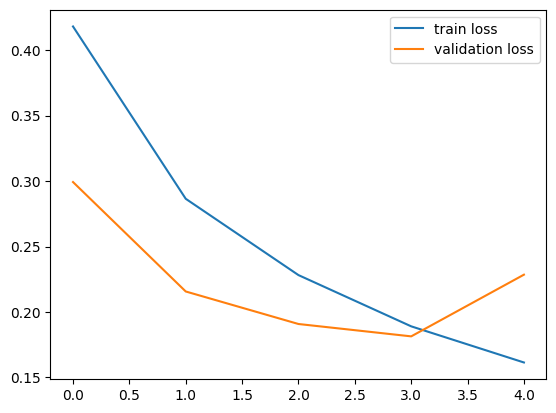

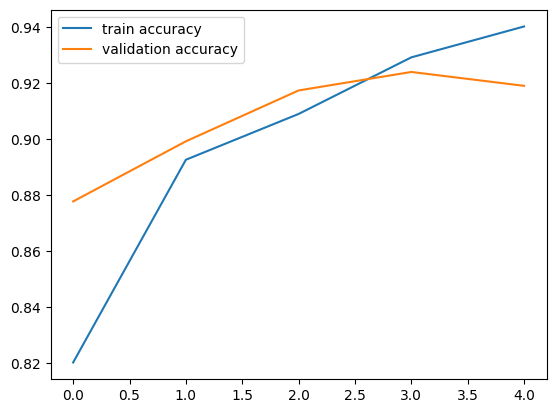

In [ ]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Enter the path of the image to be predicted:/content/pawan.jpg


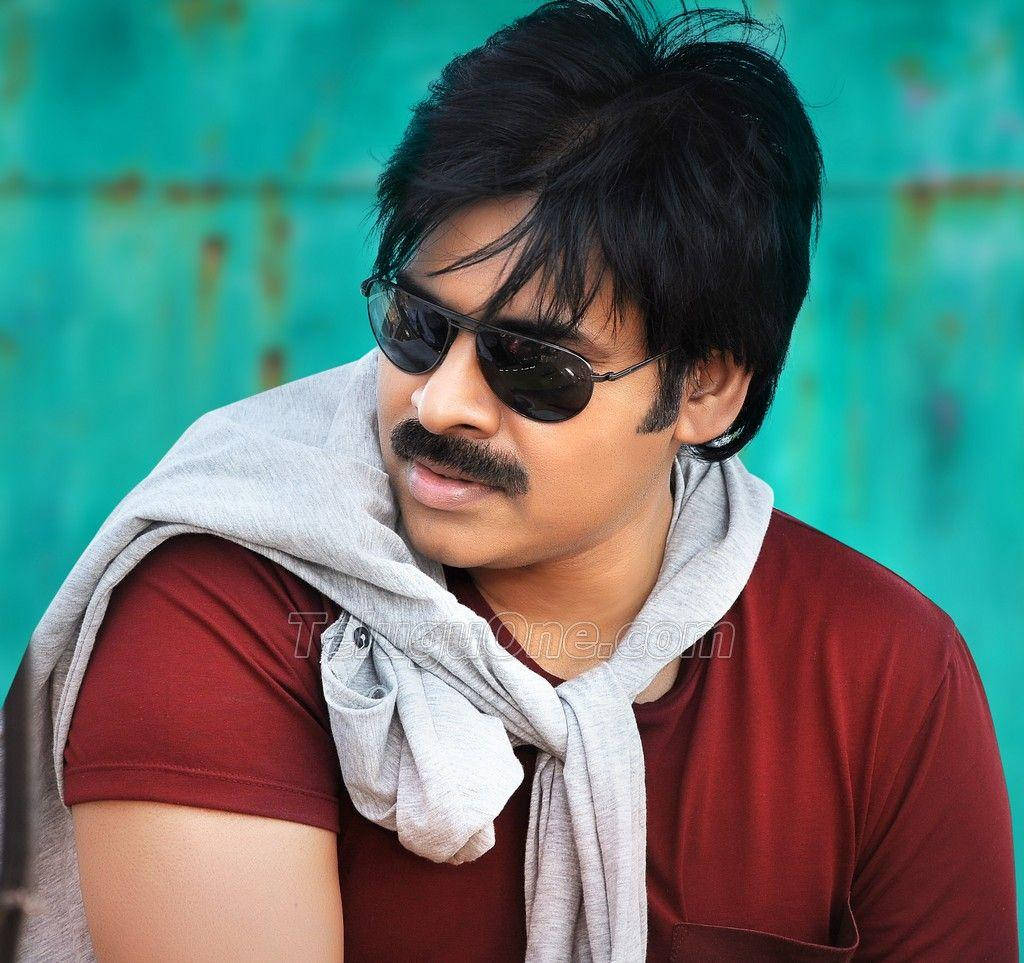

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[0.00253907 0.9939912 ]]
1
The person in the image is without mask


In [ ]:
input_image_path=input("Enter the path of the image to be predicted:")

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(128,128))

input_image_scaled=input_image_resize/255

input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==1:
  print("The person in the image is without mask")
else:
  print("The person in the image is with mask")